In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
# Read Excel file into a DataFrame

df = pd.read_excel(r"C:\Users\user\Downloads\Palindrome\pone.0212445.s004.xlsx", header=1)

# Display the DataFrame
print(df)


                     District Code     Estimate  Prevalence_%  Prevalence_LCL  \
0                Buffalo City  BUF       Survey     13.600000       10.268000   
1                Buffalo City  BUF  Fay-Heriott     13.501283       11.031605   
2           City of Cape Town  CPT       Survey      5.200000        3.044000   
3           City of Cape Town  CPT  Fay-Heriott      6.020043        4.335072   
4                  West Coast  DC1       Survey      2.700000        0.000000   
..                        ...  ...          ...           ...             ...   
99                   Mangaung  MAN  Fay-Heriott      9.147425        6.725917   
100  Nelson Mandela Bay Metro  NMA       Survey      8.300000        3.400000   
101  Nelson Mandela Bay Metro  NMA  Fay-Heriott      9.054060        6.128703   
102           City of Tshwane  TSH       Survey     11.700000        7.388000   
103           City of Tshwane  TSH  Fay-Heriott     11.024858        8.255934   

     Prevalence_UCL  NoPLHI

In [10]:
df

,District,Code,Estimate,Prevalence_%,Prevalence_LCL,Prevalence_UCL,NoPLHIV,NoPLHIV_LCL,NoPLHIV_UCL
0,Buffalo City,BUF,Survey,13.600000,10.268000,16.932000,102437,77340,127534
1,Buffalo City,BUF,Fay-Heriott,13.501283,11.031605,16.421802,101693,83092,123691
2,City of Cape Town,CPT,Survey,5.200000,3.044000,7.356000,200751,117517,283985
3,City of Cape Town,CPT,Fay-Heriott,6.020043,4.335072,8.303091,232409,167359,320548
4,West Coast,DC1,Survey,2.700000,0.000000,5.444000,11302,0,22789
...,...,...,...,...,...,...,...,...,...
99,Mangaung,MAN,Fay-Heriott,9.147425,6.725917,12.325536,101520,74646,136792
100,Nelson Mandela Bay Metro,NMA,Survey,8.300000,3.400000,13.200000,97459,39923,154995
101,Nelson Mandela Bay Metro,NMA,Fay-Heriott,9.054060,6.128703,13.179704,106313,71964,154757
102,City of Tshwane,TSH,Survey,11.700000,7.388000,16.012000,361450,228239,494661


In [11]:
# Task 1: Total number of people living with HIV (NoPLHIV) in the listed districts according to the Survey estimate
total_noplhiv_survey = df[df['Estimate'] == 'Survey']['NoPLHIV'].sum()
print(f"Total NoPLHIV in districts according to the Survey estimate: {total_noplhiv_survey}")


Total NoPLHIV in districts according to the Survey estimate: 6409903


In [12]:
# Task 2: Average NoPLHIV of the two estimates used for “Xhariep”
xhariep_data = df[df['District'] == 'Xhariep']
average_noplhiv_xhariep = xhariep_data['NoPLHIV'].mean()
print(f"Average NoPLHIV for Xhariep: {average_noplhiv_xhariep}")


Average NoPLHIV for Xhariep: 12247.5


In [13]:
# Task 3: Add a column and populate it with the number of people not living with HIV for each row
df['NoHIV'] = df['NoPLHIV_UCL'] - df['NoPLHIV']
print(df[['District', 'NoPLHIV', 'NoHIV']])


                     District  NoPLHIV   NoHIV
0                Buffalo City   102437   25097
1                Buffalo City   101693   21998
2           City of Cape Town   200751   83234
3           City of Cape Town   232409   88139
4                  West Coast    11302   11487
..                        ...      ...     ...
99                   Mangaung   101520   35272
100  Nelson Mandela Bay Metro    97459   57536
101  Nelson Mandela Bay Metro   106313   48444
102           City of Tshwane   361450  133211
103           City of Tshwane   340593  109672

[104 rows x 3 columns]


In [15]:
df[['District', 'NoPLHIV', 'NoHIV']]

,District,NoPLHIV,NoHIV
0,Buffalo City,102437,25097
1,Buffalo City,101693,21998
2,City of Cape Town,200751,83234
3,City of Cape Town,232409,88139
4,West Coast,11302,11487
...,...,...,...
99,Mangaung,101520,35272
100,Nelson Mandela Bay Metro,97459,57536
101,Nelson Mandela Bay Metro,106313,48444
102,City of Tshwane,361450,133211


In [16]:
# Task 4: Total NoPLHIV in all the cities (districts with “city” or “metro” in the name)
total_noplhiv_cities = df[df['District'].str.contains('city|metro', case=False)]['NoPLHIV'].sum()
print(f"Total NoPLHIV in all cities: {total_noplhiv_cities}")

Total NoPLHIV in all cities: 2572733


In [17]:
# Task 5: Remove all the special/non-alphabetic characters from the dataframe column names
df.columns = df.columns.str.replace('[^a-zA-Z0-9]', '')
print("DataFrame column names after removing special characters:")
print(df.columns)

DataFrame column names after removing special characters:
Index(['District', 'Code', 'Estimate', 'Prevalence', 'PrevalenceLCL',
       'PrevalenceUCL', 'NoPLHIV', 'NoPLHIVLCL', 'NoPLHIVUCL', 'NoHIV'],
      dtype='object')


<ipython-input-17-c05d2b027c02>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df.columns = df.columns.str.replace('[^a-zA-Z0-9]', '')


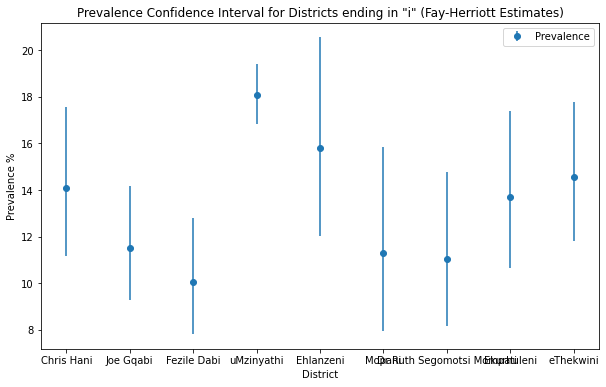

In [21]:
# Task 6: Plot Prevalence confidence interval for Districts that end in “i” according to Fay-Herriott estimates
fay_herriott_i_districts = df[df['District'].str.lower().str.endswith('i') & (df['Estimate'] == 'Fay-Heriott')]
plt.figure(figsize=(10, 6))
plt.errorbar(fay_herriott_i_districts['District'], fay_herriott_i_districts['Prevalence'],
             yerr=[fay_herriott_i_districts['Prevalence'] - fay_herriott_i_districts['PrevalenceLCL'],
                   fay_herriott_i_districts['PrevalenceUCL'] - fay_herriott_i_districts['Prevalence']],
             fmt='o', label='Prevalence')
plt.title('Prevalence Confidence Interval for Districts ending in "i" (Fay-Herriott Estimates)')
plt.xlabel('District')
plt.ylabel('Prevalence %')
plt.legend()
plt.show()


In [22]:
# This excercise took me 1hr and 49 minutes to complete it